# Import Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme(color_codes=True)

# Import Dataset from PostgreSQL

In [5]:
df = pd.read_csv('sales_data.csv')
df.head()

,productName,quantityPerUnit,product_unitPrice,discontinued,categoryName,shipCountry,order_unitPrice,quantity,discount,contactName,contactTitle,customer_country
0,Chai,10 boxes x 20 bags,18.0,0,Beverages,Germany,18.0,40,0,Renate Messner,Sales Representative,Germany
1,Chai,10 boxes x 20 bags,18.0,0,Beverages,UK,18.0,25,0,Ann Devon,Sales Agent,UK
2,Chai,10 boxes x 20 bags,18.0,0,Beverages,Belgium,18.0,10,0,Pascale Cartrain,Accounting Manager,Belgium
3,Chai,10 boxes x 20 bags,18.0,0,Beverages,USA,18.0,45,0,Jose Pavarotti,Sales Representative,USA
4,Chai,10 boxes x 20 bags,18.0,0,Beverages,Finland,18.0,10,0,Pirkko Koskitalo,Accounting Manager,Finland


# Data Preprocessing

In [6]:
# List the columns you want to drop
columns_to_drop = ['productName', 'quantityPerUnit', 'contactName']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the resulting DataFrame
df.head()

,product_unitPrice,discontinued,categoryName,shipCountry,order_unitPrice,quantity,discount,contactTitle,customer_country
0,18.0,0,Beverages,Germany,18.0,40,0,Sales Representative,Germany
1,18.0,0,Beverages,UK,18.0,25,0,Sales Agent,UK
2,18.0,0,Beverages,Belgium,18.0,10,0,Accounting Manager,Belgium
3,18.0,0,Beverages,USA,18.0,45,0,Sales Representative,USA
4,18.0,0,Beverages,Finland,18.0,10,0,Accounting Manager,Finland


# Check  the amount of unique value for each object datatype column

In [7]:
# Select only columns with object (string) data type
object_columns = df.select_dtypes(include='object')

# Calculate the number of unique values for each object-type column
unique_values = object_columns.nunique()

# Display the result
print(unique_values)

categoryName         8
shipCountry         21
contactTitle        12
customer_country    21
dtype: int64


In [8]:
# Check the amount of unique values in 'discontinued' and 'discount' columns
unique_discontinued = df['discontinued'].nunique()
unique_discount = df['discount'].nunique()

# Display the results
print(f"Unique values in 'discontinued': {unique_discontinued}")
print(f"Unique values in 'discount': {unique_discount}")

Unique values in 'discontinued': 2
Unique values in 'discount': 1


In [9]:
# Drop discount column because only have 1 unique value
df.drop(columns='discount', inplace=True)
df.head()

,product_unitPrice,discontinued,categoryName,shipCountry,order_unitPrice,quantity,contactTitle,customer_country
0,18.0,0,Beverages,Germany,18.0,40,Sales Representative,Germany
1,18.0,0,Beverages,UK,18.0,25,Sales Agent,UK
2,18.0,0,Beverages,Belgium,18.0,10,Accounting Manager,Belgium
3,18.0,0,Beverages,USA,18.0,45,Sales Representative,USA
4,18.0,0,Beverages,Finland,18.0,10,Accounting Manager,Finland


# Check the amount of missing value on each column

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the result
print(missing_percentage)

product_unitPrice    0.0
discontinued         0.0
categoryName         0.0
shipCountry          0.0
order_unitPrice      0.0
quantity             0.0
contactTitle         0.0
customer_country     0.0
dtype: float64


# Label Encoding for each Object datatype

In [11]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

categoryName: ['Beverages' 'Condiments' 'Confections' 'Dairy Products' 'Grains/Cereals'
 'Meat/Poultry' 'Produce' 'Seafood']
shipCountry: ['Germany' 'UK' 'Belgium' 'USA' 'Finland' 'Brazil' 'Canada' 'Spain'
 'Venezuela' 'Sweden' 'Ireland' 'France' 'Poland' 'Mexico' 'Portugal'
 'Switzerland' 'Austria' 'Italy' 'Denmark' 'Norway' 'Argentina']
contactTitle: ['Sales Representative' 'Sales Agent' 'Accounting Manager'
 'Marketing Manager' 'Owner/Marketing Assistant' 'Marketing Assistant'
 'Sales Manager' 'Owner' 'Sales Associate' 'Order Administrator'
 'Assistant Sales Representative' 'Assistant Sales Agent']
customer_country: ['Germany' 'UK' 'Belgium' 'USA' 'Finland' 'Brazil' 'Canada' 'Spain'
 'Venezuela' 'Sweden' 'Ireland' 'France' 'Poland' 'Mexico' 'Portugal'
 'Switzerland' 'Austria' 'Italy' 'Denmark' 'Norway' 'Argentina']


In [12]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

categoryName: [0 1 2 3 4 5 6 7]
shipCountry: [ 8 18  2 19  6  3  4 15 20 16  9  7 13 11 14 17  1 10  5 12  0]
contactTitle: [11  8  0  4  7  3 10  6  9  5  2  1]
customer_country: [ 8 18  2 19  6  3  4 15 20 16  9  7 13 11 14 17  1 10  5 12  0]


# Correlation Heatmap

<Axes: >

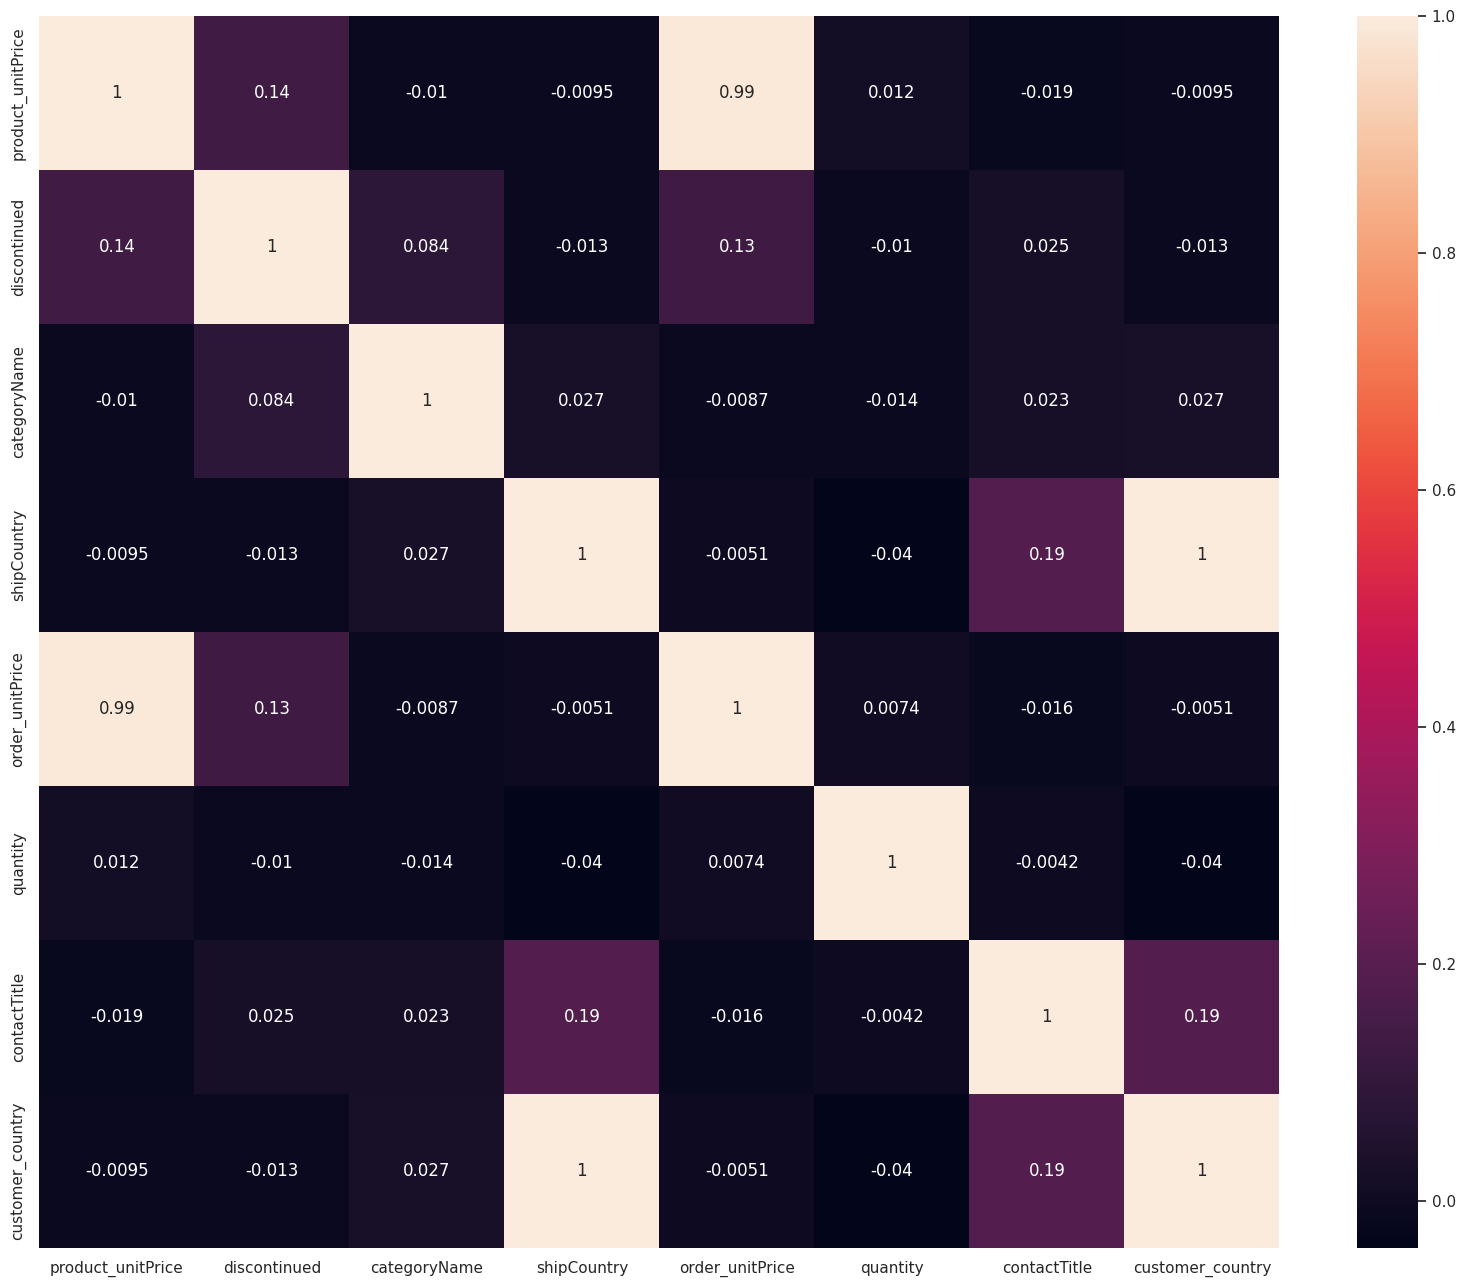

In [13]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Drop product unit price column because it have same correlation with order unit price

In [15]:
df.drop(columns='product_unitPrice', inplace=True)
df.head()

,discontinued,categoryName,shipCountry,order_unitPrice,quantity,contactTitle,customer_country
0,0,0,8,18.0,40,11,8
1,0,0,18,18.0,25,8,18
2,0,0,2,18.0,10,0,2
3,0,0,19,18.0,45,11,19
4,0,0,6,18.0,10,0,6


# Machine Learning Modelling

In [16]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('discontinued', axis=1)
y = df['discontinued']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 200, 'random_state': 0}


In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=3, max_features=None, n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=None,
                       n_estimators=200, random_state=0)

In [23]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 87.24 %


In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8723897911832946
Precision Score :  0.8723897911832946
Recall Score :  0.8723897911832946
Jaccard Score :  0.7736625514403292
Log Loss :  4.599538135502189


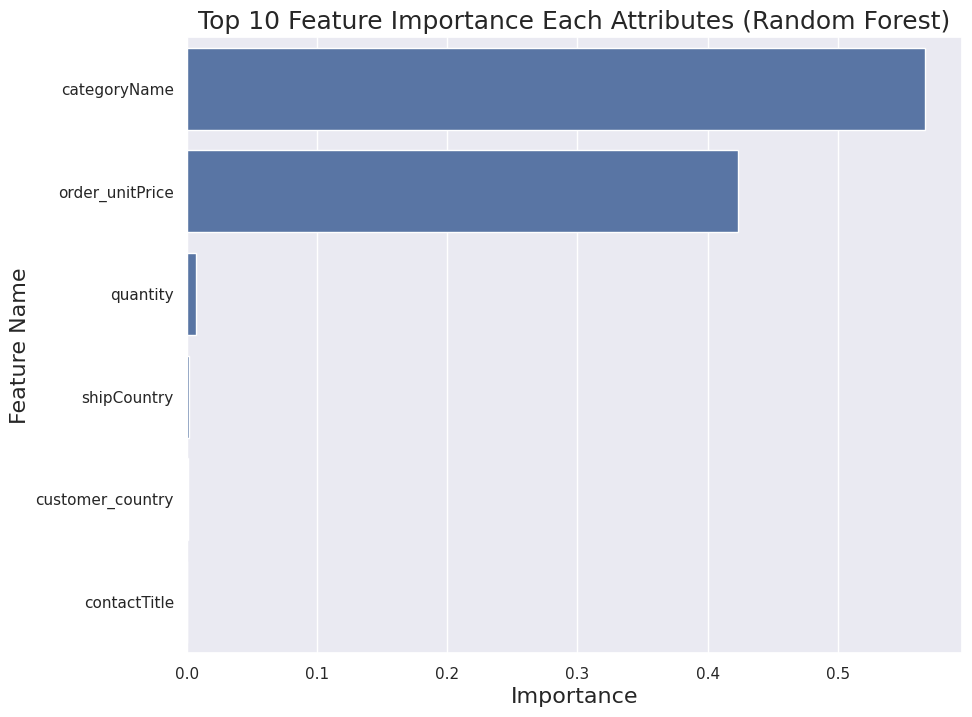

In [44]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)

# Save the plot as a PNG file
plt.savefig('feature_importance.png', format='png', bbox_inches='tight')

plt.show()

In [36]:
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown

In [45]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="*************************************")

import PIL.Image

img = PIL.Image.open("feature_importance.png")
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the random forest classifier feature importance", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The Random Forest classifier feature importance indicates that the most important features for the model are:
> 
> * **categoryName**: This feature has the highest importance, suggesting that the category of the product is a strong predictor of the outcome.
> * **order_unitPrice**: This feature also has a significant importance, indicating that the unit price of the order is another key factor.
> 
> **Actionable Insights:**
> 
> * **Focus on understanding the relationship between product categories and the outcome**: Investigate what makes certain product categories more likely to result in a particular outcome. This could involve analyzing historical data, conducting market research, or consulting domain experts.
> * **Consider pricing strategies**: The importance of order_unitPrice suggests that the price of the product plays a role in the outcome. Experiment with different pricing strategies to optimize results.
> * **Prioritize improving data quality for these features**: Ensure that the data for categoryName and order_unitPrice is accurate and complete. This will improve the model's performance and reliability.
> 
> **Other Observations:**
> 
> * **quantity**: This feature has a very low importance, suggesting that the quantity of the order has a limited impact on the outcome.
> * **shipCountry, customer_country, contactTitle**: These features have almost no importance, indicating that they are not strong predictors of the outcome.
> 
> **Conclusion:**
> 
> The feature importance analysis highlights the most important factors that influence the outcome. By understanding these factors and taking appropriate actions, we can improve the model's performance and achieve better results.

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8723897911832946')

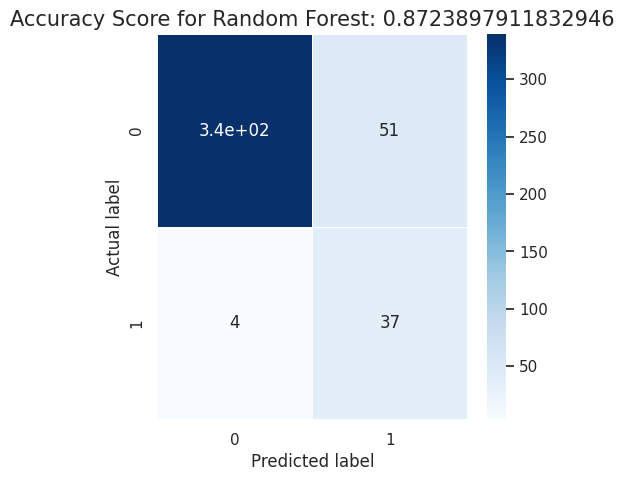

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# K-Means Clustering

In [46]:
df.head()

,discontinued,categoryName,shipCountry,order_unitPrice,quantity,contactTitle,customer_country
0,0,0,8,18.0,40,11,8
1,0,0,18,18.0,25,8,18
2,0,0,2,18.0,10,0,2
3,0,0,19,18.0,45,11,19
4,0,0,6,18.0,10,0,6


# Pick the Attribute for Clustering

In [47]:
X=df[["order_unitPrice","quantity"]]
X.head()

,order_unitPrice,quantity
0,18.0,40
1,18.0,25
2,18.0,10
3,18.0,45
4,18.0,10


In [48]:
# Make 3 Clusters
from sklearn.cluster import KMeans
km1=KMeans(n_clusters=3, random_state=0)
km1.fit(X)
y=km1.predict(X)
df["cluster"] = y
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,discontinued,categoryName,shipCountry,order_unitPrice,quantity,contactTitle,customer_country,cluster
0,0,0,8,18.0,40,11,8,0
1,0,0,18,18.0,25,8,18,1
2,0,0,2,18.0,10,0,2,1
3,0,0,19,18.0,45,11,19,0
4,0,0,6,18.0,10,0,6,1


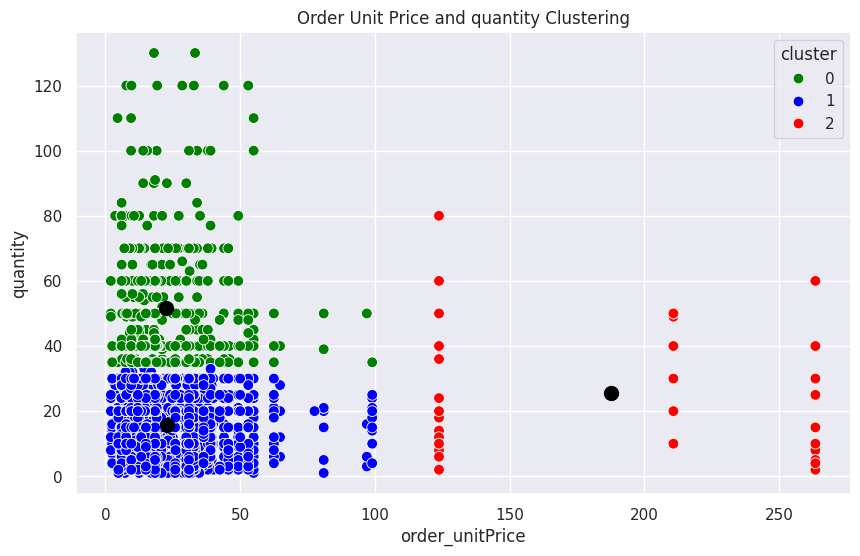

In [49]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'order_unitPrice',y = 'quantity',hue="cluster",
                 palette=['green','blue','red'], legend='full',data = df,s = 60 )
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('order_unitPrice')
plt.ylabel('quantity')
plt.title('Order Unit Price and quantity Clustering')

# Save the plot as a PNG file
plt.savefig('cluster.png', format='png', bbox_inches='tight')
plt.show()

In [50]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="**********************************")

import PIL.Image

img = PIL.Image.open("cluster.png")
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the cluster data", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> The scatter plot shows the clustering of orders based on their unit price and quantity.
> 
> * **Cluster 0 (green)**: This cluster represents orders with a relatively low unit price and a moderate quantity. The cluster centroid is located around (30, 50).
> * **Cluster 1 (blue)**: This cluster represents orders with a very low unit price and a small quantity. The cluster centroid is located around (20, 15).
> * **Cluster 2 (red)**: This cluster represents orders with a high unit price and a small quantity. The cluster centroid is located around (200, 25). 
> 
> **Actionable Insights:**
> 
> * **Cluster 0:** These orders are the most frequent and represent the majority of the sales. This cluster might represent your core products with a good balance between price and quantity. You can focus on promoting these products and ensuring their continued availability.
> * **Cluster 1:** These orders represent small purchases with low unit price. This could be your "value" products or products that are frequently purchased in small quantities. You can consider offering promotions or bundle deals to encourage customers to purchase more of these products.
> * **Cluster 2:** These orders are relatively few but represent high-value sales. This cluster might represent your premium products or products with a high profit margin. You can focus on marketing these products to your high-spending customers.
> 
> By understanding the characteristics of each cluster, you can develop targeted strategies to optimize your product offerings, marketing campaigns, and customer segmentation efforts.

# Analyze the Power BI Dashboard

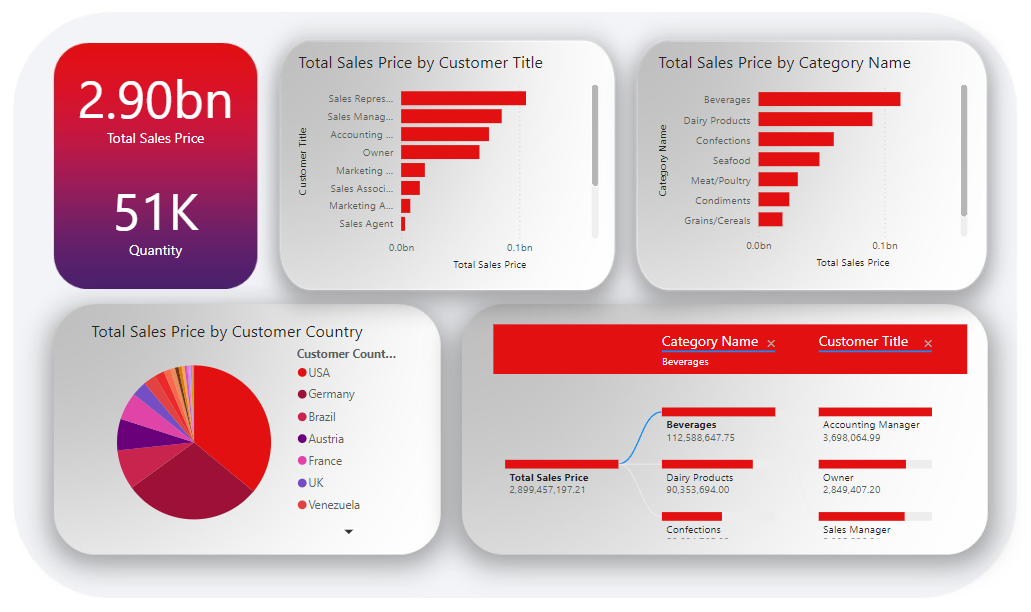

In [35]:
from IPython.display import Image, display

# Display the image
display(Image(filename='dashboard.PNG'))

In [43]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

genai.configure(api_key="***************************************")

import PIL.Image

img = PIL.Image.open("dashboard.PNG")
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(img)

response = model.generate_content(["Explain it by points in simple and clear terms. Provide key findings and actionable insights based on the content", img], stream=True)
response.resolve()
formatted_text = to_markdown(response.text)
display(formatted_text)

> ## Key Findings and Actionable Insights:
> 
> **Overall Performance:**
> 
> * **Strong sales:** The company achieved a total sales price of 2.9 billion with 51k transactions. 
> * **Beverages are the top seller:**  Beverages contributed the highest sales price among all categories.
> * **USA is the top customer:** The majority of sales originated from the USA, followed by Germany.
> 
> **Customer Insights:**
> 
> * **Sales Representatives are the top performers:**  The sales representatives contribute the highest sales price compared to other titles.
> * **Focus on "Owner" and "Accounting Manager":** These customer titles show significant potential and could be targeted for further growth.
> 
> **Category Insights:**
> 
> * **Explore new categories:** The top category (Beverages) contributed a large portion of the total sales. Consider exploring other categories with high potential for growth.
> * **Expand in Dairy Products:** Dairy products are the second best-selling category. This category could benefit from further marketing and promotion.
> 
> **Actionable Insights:**
> 
> * **Invest in sales training:** Focus on sales training for the team to further increase sales performance, especially targeting the top-performing titles like Sales Representative.
> * **Target specific customer segments:**  Focus on customer segments with high sales potential like “Owner” and "Accounting Manager." 
> * **Expand product portfolio:** Explore new product categories beyond beverages, focusing on categories with significant potential like Dairy Products.
> * **Increase marketing efforts:** Invest in marketing campaigns to promote the top-selling categories and explore new categories with high growth potential.
> * **Analyze customer behavior:** Understand the buying patterns of different customer segments to create targeted marketing strategies and promotions.